# Libraries


In [330]:
import pandas as pd
import matplotlib.pyplot as plt

# Variables

**Duty cycle**

In [331]:
timeSleepSeconds = 53%50 +5
timeSleepMicroseconds = timeSleepSeconds*10e+5
print(timeSleepMicroseconds, "microseconds")

8000000.0 microseconds


**Battery**

In [332]:
JBattery= 6953%5000+15000
print(JBattery, "Joule")

16953 Joule


# Dataset Analysis

**Structure of the dataset**

In [333]:
dataset = pd.read_csv("deep_sleep.csv")
print(dataset.head(3))

                    Timestamp   Data
0  2024-03-03 20:14:47.705952  59.89
1  2024-03-03 20:14:47.756244  59.50
2  2024-03-03 20:14:47.805842  59.82


**Description of the dataset**

In [334]:
print(dataset.describe())

             Data
count  726.000000
mean   196.190455
std    229.660507
min     58.640000
25%     59.530000
50%     59.860000
75%    308.632500
max    778.710000


From this graph it's possible to distinguish when the ESP32 is in a particular state.

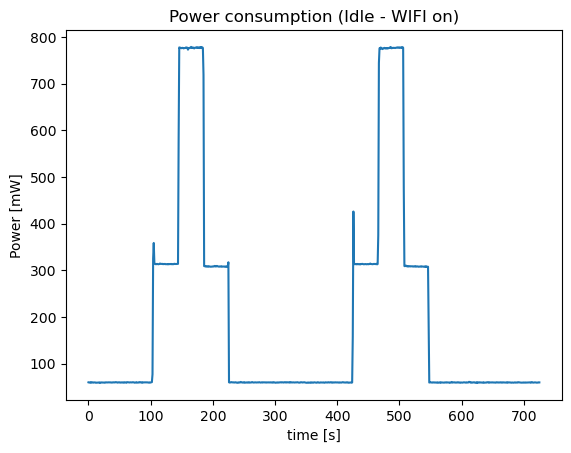

In [335]:
dataset.plot(xlabel="time [s]",                                       
            ylabel="Power [mW]",                                      
            title="Power consumption (Idle - WIFI on)",  
            kind="line",                                              
            legend=False);

# Average Power Consumption

Computing the average power consuption during each functional state requires filtering the datapoints according to empirical observation of the plotted data.

| deep sleep | idle              | WiFi on  |
|------------|-------------------|----------|
| < 100 mW   | >300 mW, < 500 mW | > 600 mW | 

Computing the average power consuption during the **deep sleep** state, it's filtered all the datapoints below the 100W

In [336]:
records = dataset["Data"]

averagePowerDS = records[records< 100].mean().round(3)
averagePowerIS = records[records> 300][records< 500].mean().round(3)
averagePowerTX2_1 = records[records> 600].mean().round(3)

print("Deep Sleep: ",averagePowerDS, "mW")
print("Idle: ", averagePowerIS, "mW")
print("Transmitting at 2 dBm: ", averagePowerTX2_1, "mW")



Deep Sleep:  59.661 mW
Idle:  313.398 mW
Transmitting at 2 dBm:  775.489 mW


# Data transmission

**Structure of the dataset**

In [337]:
dataset = pd.read_csv("transmission_power.csv")
print(dataset.head(3))

records = dataset["Data"]

                    Timestamp    Data
0  2024-03-03 19:04:29.955113  704.75
1  2024-03-03 19:04:30.005088  703.82
2  2024-03-03 19:04:30.054739  704.65


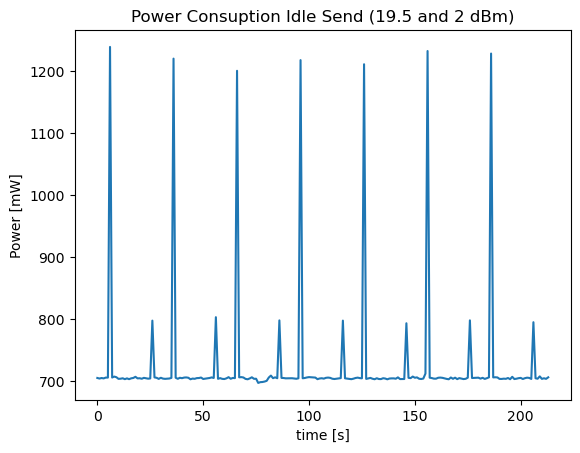

In [338]:
dataset.plot(xlabel="time [s]",                                   
            ylabel="Power [mW]",                                  
            title="Power Consuption Idle Send (19.5 and 2 dBm)",  
            kind="line",                                          
            legend=False);

Calculating power consumption whan WiFi is on  

In [339]:
wf_data = records[records < 720]
averagePowerWF = wf_data.mean().round(3)
print("Sending signals at 2dBm: ", averagePowerWF, "mW\t Peak: ", wf_data.max(), "mW")

Sending signals at 2dBm:  704.215 mW	 Peak:  711.82 mW


Calculating power consumption when **transmitting** at **2 dBm power**

In [340]:
tx2_data = records[records> 750][records< 850]
averagePowerTX2 = tx2_data.mean().round(3)
print("Sending signals at 2dBm: ", averagePowerTX2, "mW \t Peak: ", tx2_data.max(), "mW")

Sending signals at 2dBm:  797.294 mW 	 Peak:  802.91 mW


Board consumption when **transmitting** at 19.5 dBm power

In [341]:
tx19_data = records[records> 1200]
averagePowerTX19 = tx19_data.mean().round(3)
print("Sending signals at 19.5dBm: ", averagePowerTX19, "mW \t Peak: ", tx19_data.max(), "mW")

Sending signals at 19.5dBm:  1221.76 mW 	 Peak:  1239.49 mW


# Sensor reading

In [342]:
dataset = pd.read_csv("sensor_read.csv")
print(dataset.head(3))

records = dataset["Data"]

                    Timestamp    Data
0  2024-03-03 20:24:46.935040  467.11
1  2024-03-03 20:24:46.984494  466.25
2  2024-03-03 20:24:47.034875  466.68


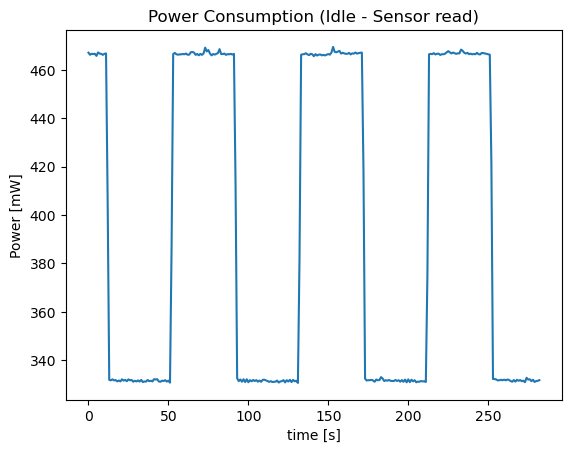

In [343]:
dataset.plot(xlabel="time [s]", 
            ylabel="Power [mW]", 
            title="Power Consumption (Idle - Sensor read)", 
            kind="line", 
            legend=False);

Sensor unused: **Idle**

In [344]:
is2_data = records[records < 340]
averagePowerIS2 = is2_data.mean().round(3)
print("Idle: ", averagePowerIS2, "mW \tPeak: ", is2_data.max(), "mW")

Idle:  331.586 mW 	Peak:  333.04 mW


Sensor **reading**

In [345]:
sr_data = records[records> 460]
averagePowerSR = sr_data.mean().round(3)
print("Sensor reading: ", averagePowerSR, "mW \tPeak: ", sr_data.max(), "mW")

Sensor reading:  466.745 mW 	Peak:  469.49 mW


# Outcome

Final results of all the averages

In [346]:
print("deep sleep: ", averagePowerDS, "mW")
print("idle [1]: ", averagePowerIS, "mW")
print("idle [2]: ", averagePowerIS2, "mW")
print("WiFi ON: ", averagePowerWF, "mW")
print("transmission [2 dBm]: ", averagePowerTX2, "mW")
print("transmission [19.5 dBm]: ", averagePowerTX19, "mW")
print("sensor reading: ", averagePowerSR, "mW")

deep sleep:  59.661 mW
idle [1]:  313.398 mW
idle [2]:  331.586 mW
WiFi ON:  704.215 mW
transmission [2 dBm]:  797.294 mW
transmission [19.5 dBm]:  1221.76 mW
sensor reading:  466.745 mW


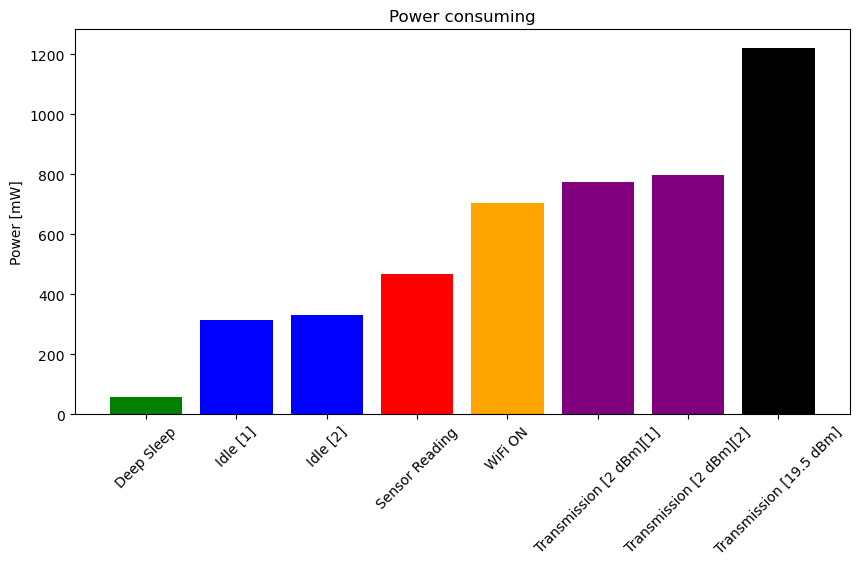

In [347]:
states = ["Deep Sleep", "Idle [1]", "Idle [2]", "WiFi ON", "Transmission [2 dBm][1]", "Transmission [2 dBm][2]", "Transmission [19.5 dBm]", "Sensor Reading" ]

power_values = [
    averagePowerDS, averagePowerIS, averagePowerIS2, averagePowerWF,
    averagePowerTX2_1, averagePowerTX2, averagePowerTX19, averagePowerSR
]

sorted_data = sorted(zip(power_values, states))
sorted_power_values, sorted_states = zip(*sorted_data)

plt.figure(figsize=(10, 5))
plt.bar(sorted_states, sorted_power_values, color=['green', 'blue', 'blue', 'red', 'orange', 'purple','purple', 'black'])

plt.ylabel("Power [mW]")
plt.title("Power consuming")
plt.xticks(rotation=45)

plt.show()


In our case we don't consume Transmission power at 19.5 dBm, due the fact that we use the component only at 2dBm

# Time estimation

In [348]:
time_dataset = pd.read_csv("timing.csv")
print("Dataset shape: \n", time_dataset.head(3))

time_dataset["Duration"] = time_dataset["Timestamp"].diff()
time_dataset.dropna(inplace=True)

diff_labels = [
    "idle time",
    "sensor reading time",
    "wifi init time",
    "transmission [2 dBm] time",
    "wifi shutdown time",
]

time_results = dict(zip(diff_labels, time_dataset["Duration"].values[:len(diff_labels)]))

print("\n\nAverage time for each operational state: ")
for key, value in time_results.items():
    print(f"{key}: {value:.2f} us")


Dataset shape: 
    Timestamp                   Status
0          0                  Booting
1        942          Setup completed
2       4714  Sensor reading complete


Average time for each operational state: 
idle time: 942.00 us
sensor reading time: 3772.00 us
wifi init time: 191411.00 us
transmission [2 dBm] time: 132.00 us
wifi shutdown time: 54629.00 us


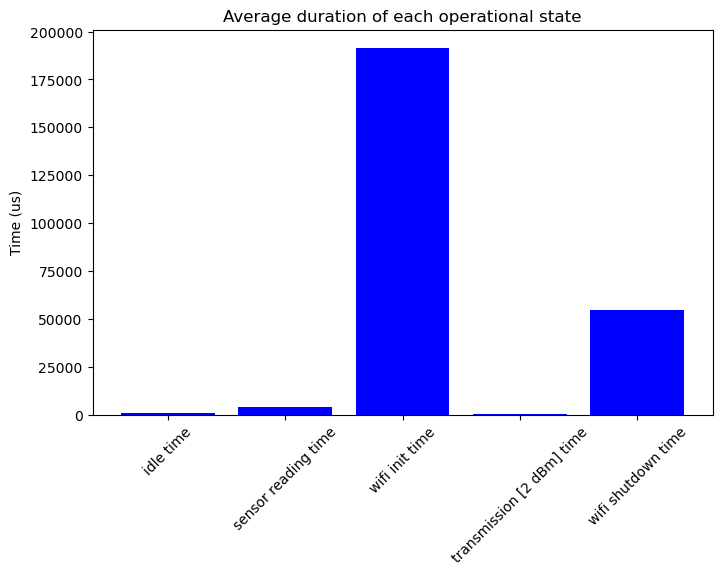

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(time_results.keys(), time_results.values(), color='orange')
plt.ylabel("Time (us)")
plt.title("Average duration of each operational state")
plt.xticks(rotation=45)
plt.show()

# Energy consumption

Average energy consumption can be seen as the integral of power in time, so as the product of the average power consumption of a operational state times the durration of it

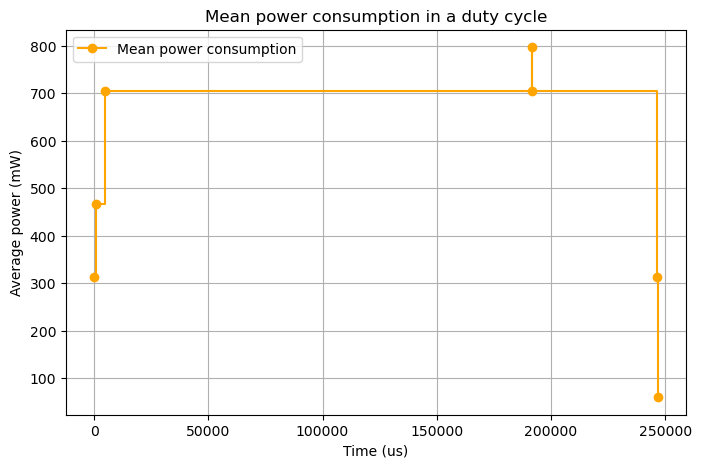

In [350]:
data = {
    "Time start": [
        time_dataset.loc[time_dataset["Status"] == "Booting", "Timestamp"].mean().round(3),
        time_dataset.loc[time_dataset["Status"] == "Setup completed", "Timestamp"].mean().round(3),
        time_dataset.loc[time_dataset["Status"] == "Sensor reading complete", "Timestamp"].mean().round(3),
        time_dataset.loc[time_dataset["Status"] == "Wifi initialized", "Timestamp"].mean().round(3),
        time_dataset.loc[time_dataset["Status"] == "Message sent", "Timestamp"].mean().round(3),
        time_dataset.loc[time_dataset["Status"] == "WiFi turned off", "Timestamp"].mean().round(3),
        time_dataset.loc[time_dataset["Status"] == "Entering deep sleep", "Timestamp"].mean().round(3)
    ],
    "Average power": [averagePowerIS, averagePowerSR, averagePowerWF, averagePowerTX2, averagePowerWF, averagePowerIS, averagePowerDS]  # Potenza media in quell'intervallo
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
plt.step(df["Time start"], df["Average power"], where='post', linestyle="-", marker="o", color="orange", label="Mean power consumption")

plt.xlabel("Time (us)")
plt.ylabel("Average power (mW)")
plt.title("Mean power consumption in a duty cycle")
plt.legend()
plt.grid()

plt.show()

In [351]:
print("Energy consumption per state: ")

powers = {"deep sleep":averagePowerDS, 
          "idle":averagePowerIS, 
          "sensor reading":averagePowerSR, 
          "wifi on":averagePowerWF, 
          "transmission [2 dBm]":averagePowerTX2
        }

op_times = {"deep sleep": 8*10e5,
            "idle": time_results["idle time"],
            "sensor reading": time_results["sensor reading time"],
            "wifi on": time_results["wifi init time"] + time_results["wifi shutdown time"],
            "transmission [2 dBm]": time_results["transmission [2 dBm] time"]
          }

for key, value in powers.items():
    print(f"{key}:\t{value*op_times[key]/10e5:.3f} mJ")

totEnergy = sum([value*op_times[key] for key, value in powers.items()])/10e5
print("\nTotal energy consumption: ", totEnergy, "mJ")

totTime = sum([value for key, value in op_times.items()])/10e5
print("Total cycle time: ", totTime, "s")


Energy consumption per state: 
deep sleep:	477.288 mJ
idle:	0.295 mJ
sensor reading:	1.761 mJ
wifi on:	173.265 mJ
transmission [2 dBm]:	0.105 mJ

Total energy consumption:  652.7140844639999 mJ
Total cycle time:  8.250886 s


## Battery life

Calculate numbers of cycles and time duration of the battery

In [352]:
battery_cycles = JBattery/(totEnergy/10e2)
print(f"Battery cycles: {battery_cycles:.0f}")

battery_life = battery_cycles*totTime/3600
print(f"Battery life: {battery_life:.2f} h")


Battery cycles: 25973
Battery life: 59.53 h
